<a href="https://colab.research.google.com/github/desaraju02/ai_ml_dl/blob/main/Netflix_Stock_Price_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# step -1 (Importing libraries)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# step -2  ( Data loading )
df = pd.read_csv("NFLX.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
# Remove all extra column from our data
df = df.drop(columns=["Open" ,'High','Low', 'Close','Volume'])
df

,Date,Adj Close
0,2018-02-05,254.259995
1,2018-02-06,265.720001
2,2018-02-07,264.559998
3,2018-02-08,250.100006
4,2018-02-09,249.470001
...,...,...
1004,2022-01-31,427.140015
1005,2022-02-01,457.130005
1006,2022-02-02,429.480011
1007,2022-02-03,405.600006


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Adj Close  1009 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.9+ KB


In [ ]:
# Fix the data type of date column
df.Date=pd.to_datetime(df.Date)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Adj Close  1009 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.9 KB


In [ ]:
df

,Date,Adj Close
0,2018-02-05,254.259995
1,2018-02-06,265.720001
2,2018-02-07,264.559998
3,2018-02-08,250.100006
4,2018-02-09,249.470001
...,...,...
1004,2022-01-31,427.140015
1005,2022-02-01,457.130005
1006,2022-02-02,429.480011
1007,2022-02-03,405.600006


In [ ]:
# Make the Date column as your index
df.set_index(["Date"], inplace=True)
df

,Adj Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


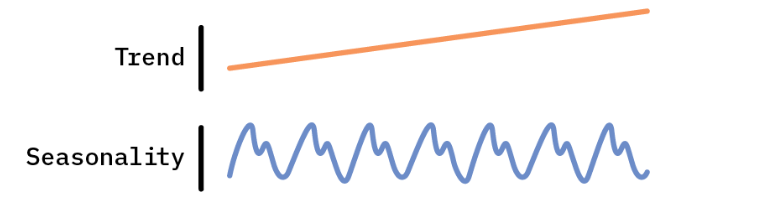

**Check whether the data is stationary or not ?**

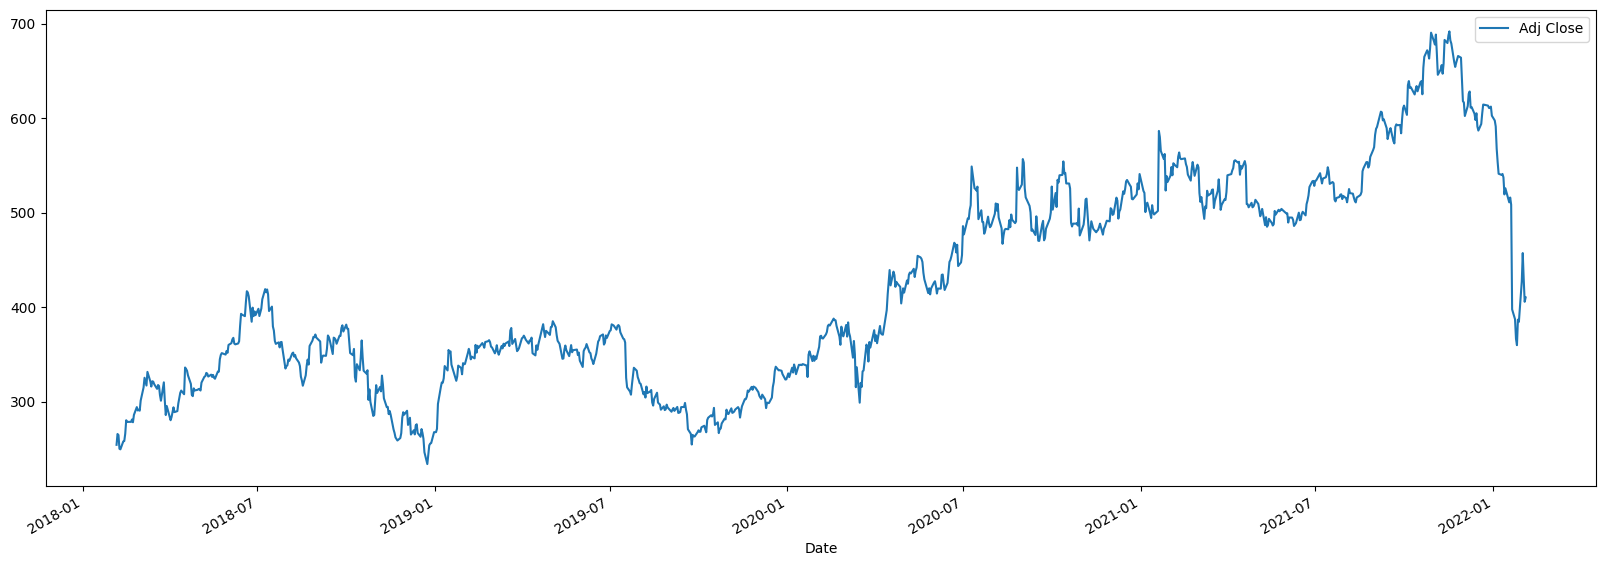

In [ ]:
df.plot(figsize=(20,7))
plt.show()

**adfuller test to find whether the data is stationary or not ?**

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df)
result[1]  # print p value present at index 1

0.3742289256820759

In [ ]:
# If p is less than 0.05 = DATA IS STATIONARY
# If p value is greater than 0.05 = DATA IS NOT STATIONARY

In [ ]:
if result[1] >= 0.05:
  print("This data is not stationary")
else:
  print("This data is stationary")

This data is not stationary


Figure(640x480)


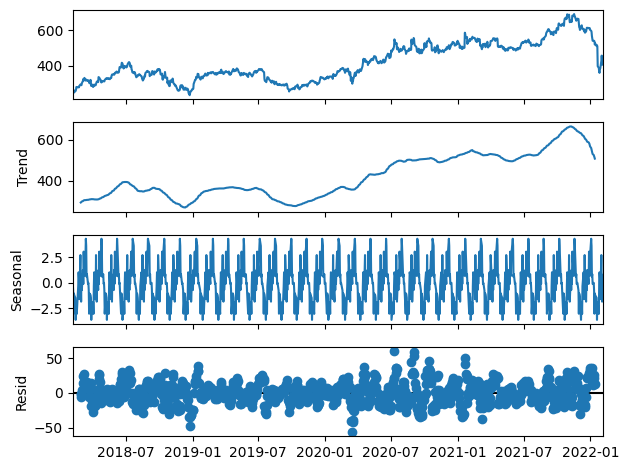

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result =seasonal_decompose(df, period = 30)
print(result.plot())

**Our data is showing both Trend and seasonality so that means we are having a Non-Satationary data**

**Convert this Non - Stationary data to Stationary data**

In [ ]:
new_data = df-df.shift(1)  # By removing trend and pattern we will be achieving stationarity
new_data= new_data.dropna()

**Again check whether do we have stationary data now or not?**

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(new_data)
result[1]  # print p value present at index 1

# 1.5304022754298515 * 10^-26

1.5304022754298515e-26

In [ ]:
if result[1] >= 0.05:
  print("This data is not stationary")
else:
  print("This data is stationary")

This data is stationary


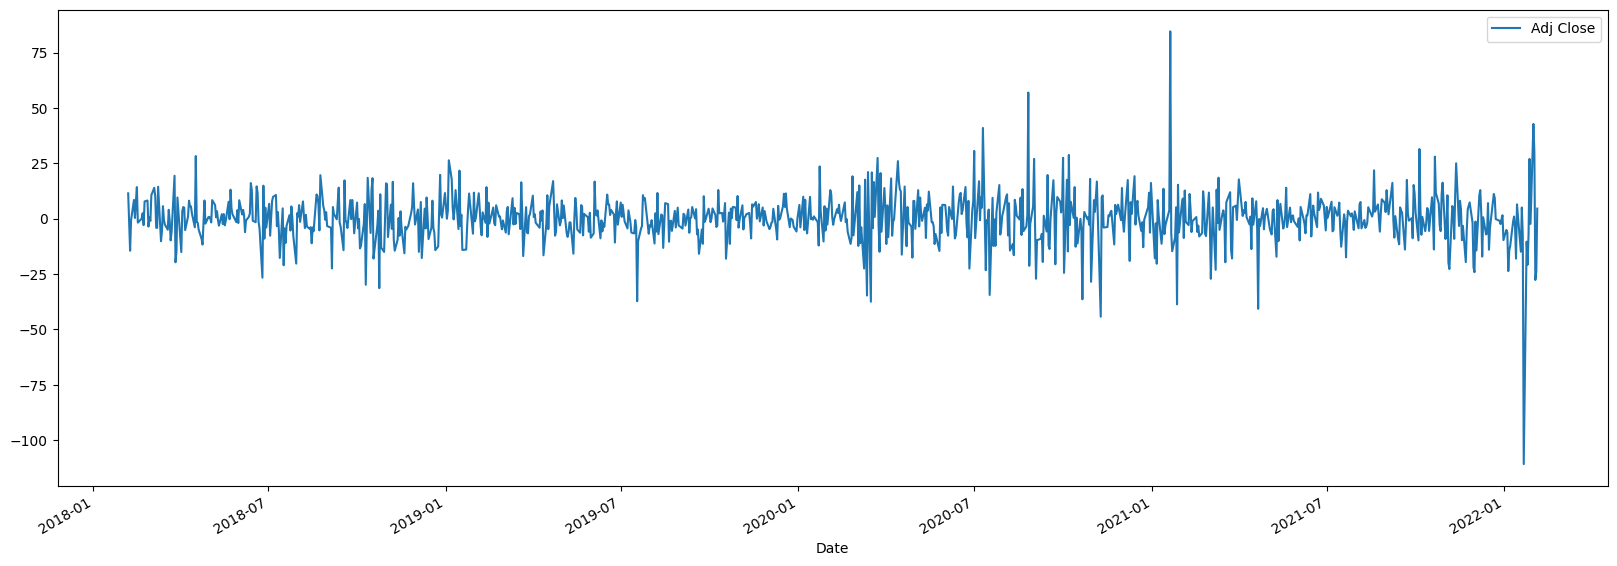

In [ ]:
# Graph of STATIONARY data
new_data.plot(figsize=(20,7))
plt.show()

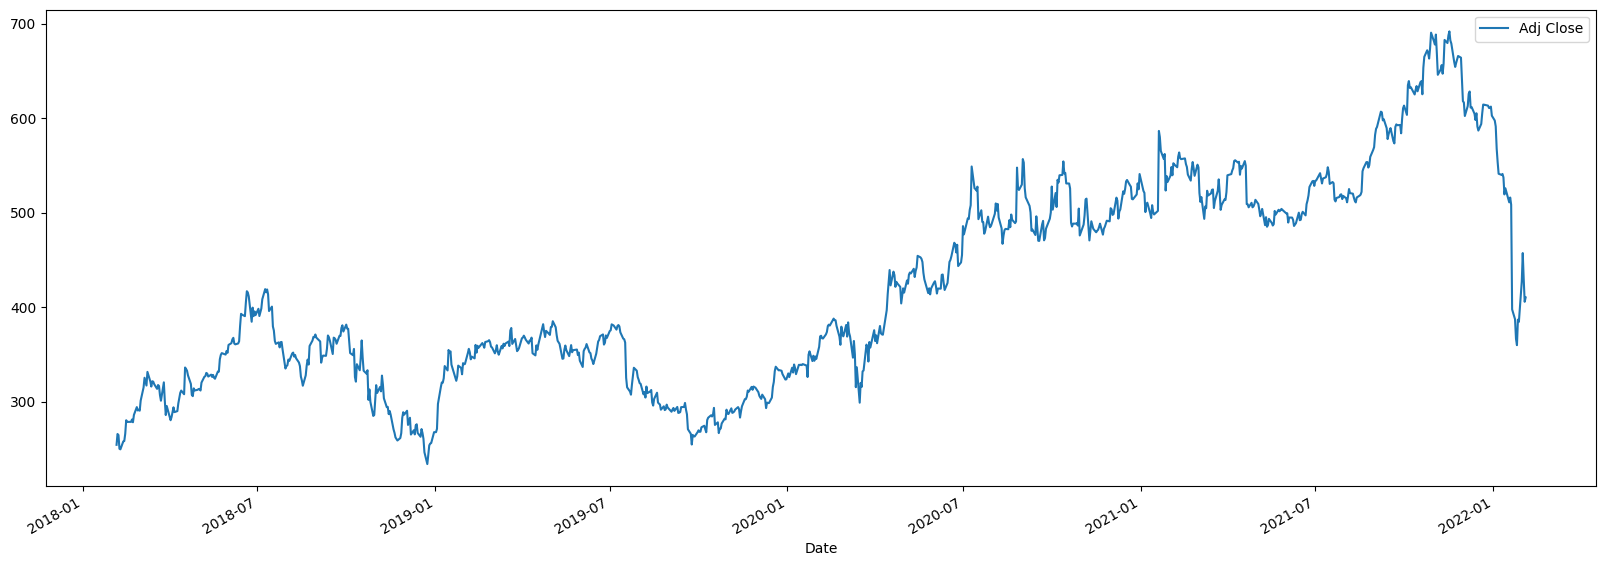

In [ ]:
# Graph of NON-STATIONARY data
df.plot(figsize=(20,7))
plt.show()

# Model Building

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

**User Itertools to find the optimal value of p,d,q**

In [ ]:
import itertools
from sklearn.metrics import mean_squared_error

trainsize = int(len(new_data)*0.8)  # Selecting 80percent of full data for training
trainsize
# out of 1007 rows

806

In [ ]:
train=df["Adj Close"][: trainsize]
test=df["Adj Close"][trainsize : ]

p=range(0,7)
d=range(1,2)
q=range(0,7)

# Create a combination of different different value of p,d,q, that you can try in your model
pdq = list(itertools.product(p,d,q))

rmse=[]  # to store the rmse score of different different value of pdq whichever pdq gives best score consier ti as final value
order1=[]

for i in pdq:
  model = ARIMA(train, order =i)
  model_fit = model.fit()
  pred = model_fit.predict(start = len(train)  , end = len(train) + len(test)-1)
  error = np.sqrt(mean_squared_error(test , pred))  # compare actual value vs predicted value

  # Add the score in the list so later on we can compare all score of all pdq values
  order1.append(i)
  rmse.append(error)

# store the result in a dataframe to compare them
result = pd.DataFrame(index = order1 , data = rmse , columns=["RMSE score"])
result

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/

,RMSE score
"(0, 1, 0)",70.279051
"(0, 1, 1)",70.325830
"(0, 1, 2)",70.318572
"(0, 1, 3)",70.330479
"(0, 1, 4)",70.321461
"(0, 1, 5)",70.365610
"(0, 1, 6)",70.380547
"(1, 1, 0)",70.323095
"(1, 1, 1)",70.326899
"(1, 1, 2)",70.334866


In [ ]:
# start making predict from inde 806
start = len(train)
start

806

In [ ]:
# Till index 1007
end = len(train) + len(test)
end

1009

In [ ]:
1009-807

202

In [ ]:
# Create a model    # order=(p,d,q)
'''
p= Auto regressive part ( How many past value you want to use to predict the current value)
d= Differencing ( how many time you did differencing to make your data as stationary)
q= Moving average part ( How many lags of residual you used to predict the current value)
'''

model1 = ARIMA(df["Adj Close"], order =(6,1,6))
result1 = model1.fit()
result1.summary()  # It will print the summary of your ARIMA model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 1009
Model:                 ARIMA(6, 1, 6)   Log Likelihood               -3838.361
Date:                Sun, 10 Nov 2024   AIC                           7702.723
Time:                        16:23:22   BIC                           7766.627
Sample:                             0   HQIC                          7727.002
                               - 1009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2226      0.065      3.445      0.001       0.096       0.349
ar.L2          0.6265      0.062     10.131      0.000       0.505       0.748
ar.L3         -1.1327      0.069    -16.518      0.000      -1.267      -0.998
ar.L4          0.5390      0.062      8.658      0.000       0.417       0.661
ar.L5          0.2455      0.056      4.348      0.000       0.135       0.356
ar.L6         -0.8749      0.065    -13.535      0.000      -1.002      -0.748
ma.L1         -0.2625      0.074     -3.540      0.000      -0.408      -0.117
ma.L2         -0.5879      0.068     -8.668      0.000      -0.721      -0.455
ma.L3          1.1596      0.071     16.444      0.000       1.021       1.298
ma.L4         -0.5766      0.065     -8.882      0.000      -0.704      -0.449
ma.L5         -0.2654      0.065     -4.060      0.000      -0.394      -0.137
ma.L6          0.8397      0.073     11.528      0.000       0.697       0.982
sigma2       120.4552      2.382     50.562      0.000     115.786     125.125
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              9330.40
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               2.16   Skew:                            -0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Lets directly add a new column to our data to show predicted values
df["Prediction_by_ARIMA"] = result1.predict( start = 1 , end = 1008)

In [ ]:
df

,Adj Close,Prediction_by_ARIMA
Date,,
2018-02-05,254.259995,NaN
2018-02-06,265.720001,254.258723
2018-02-07,264.559998,265.259372
2018-02-08,250.100006,264.964598
2018-02-09,249.470001,250.541367
...,...,...
2022-01-31,427.140015,391.656473
2022-02-01,457.130005,431.383101
2022-02-02,429.480011,455.196725


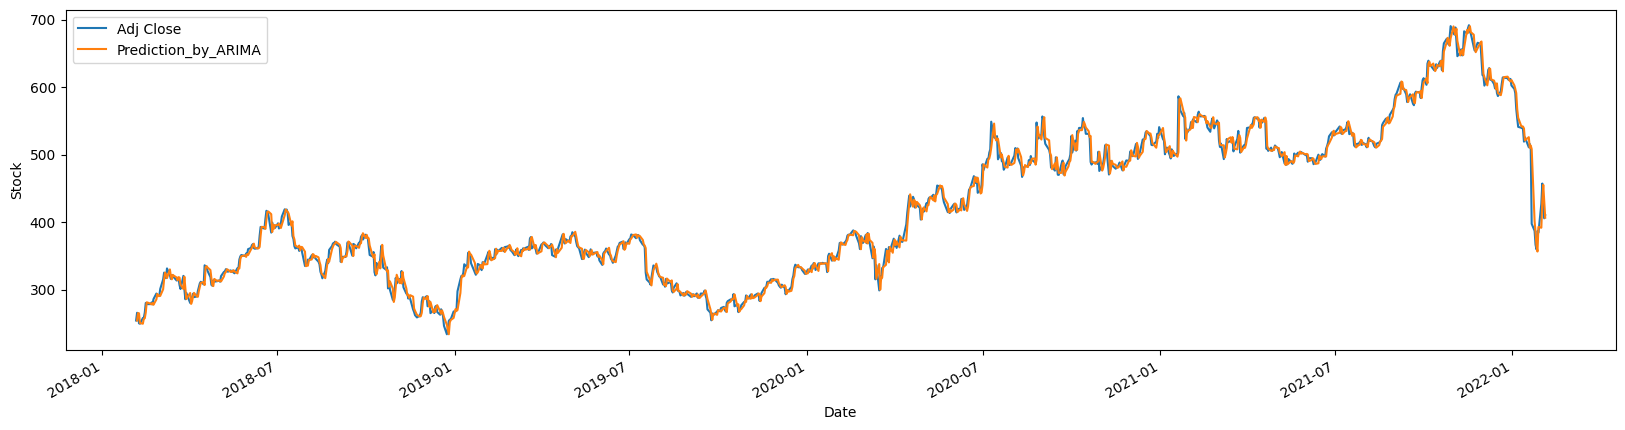

In [ ]:
# Lets draw a plot to show real value and predicted value
df[["Adj Close" , "Prediction_by_ARIMA"]].plot(figsize=(20,5))
plt.xlabel("Date")
plt.ylabel("Stock")
plt.show()

In [ ]:
# Use the model for future prediction
forecast = result1.get_forecast(steps=30)

In [ ]:
# Extract the forecasast value for upcoming 30 days after 4th feb 2022
forecast_value = forecast.predicted_mean
forecast_value

,predicted_mean
1009,408.603822
1010,400.179374
1011,393.166354
1012,391.768230
1013,396.047945
1014,398.195215
1015,398.460530
1016,399.912785
1017,406.069384
1018,411.480072


In [ ]:
forecast = result1.get_forecast(steps=365)
forecast_value = forecast.predicted_mean
forecast_value

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,predicted_mean
1009,408.603822
1010,400.179374
1011,393.166354
1012,391.768230
1013,396.047945
...,...
1369,402.316463
1370,402.313815
1371,402.317588
1372,402.314904
